# Proyecto

Gabriela Sofía Lara Moreno

Silvia Marcela Coy Lizarazo

### LIBRERIAS

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from collections import Counter
from unicodedata import normalize
import datetime as dt
import math

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\larag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\larag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### LEER ARCHIVOS CSV

In [15]:
archivo = pd.read_csv('radiación solar - SPEC.csv')
archivo.head(3)
archivo2 = pd.read_csv('radiación solar - SPEC.csv')

### DATAFRAME

In [16]:
archivo2.columns = ['id','Estacion','Ciudad','Ubicacion','Longitud','Latitud','radiacion','fecha']
archivo2


,id,Estacion,Ciudad,Ubicacion,Longitud,Latitud,radiacion,fecha
0,5,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,525.7,2018-03-13T12:30
1,6,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,279.6,2018-03-13T12:35
2,7,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,305.6,2018-03-13T12:40
3,8,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,242.2,2018-03-13T12:45
4,9,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,430.3,2018-03-13T12:50
...,...,...,...,...,...,...,...,...
1047207,1047212,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,281.9,2018-03-13T12:00
1047208,1047190,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,218.5,2018-03-13T10:08
1047209,1047213,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,560.5,2018-03-13T12:05
1047210,1047205,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,461.5,2018-03-13T11:24


In [17]:

archivo2[['f1','hora']] = archivo2['fecha'].str.split('T',expand=True)
archivo2.head()


,id,Estacion,Ciudad,Ubicacion,Longitud,Latitud,radiacion,fecha,f1,hora
0,5,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,525.7,2018-03-13T12:30,2018-03-13,12:30
1,6,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,279.6,2018-03-13T12:35,2018-03-13,12:35
2,7,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,305.6,2018-03-13T12:40,2018-03-13,12:40
3,8,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,242.2,2018-03-13T12:45,2018-03-13,12:45
4,9,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,430.3,2018-03-13T12:50,2018-03-13,12:50


In [18]:

archivo2[['Año','Mes','Dia']] = archivo2['f1'].str.split('-',expand=True)
pru1=archivo2.copy()
archivo2.head()


,id,Estacion,Ciudad,Ubicacion,Longitud,Latitud,radiacion,fecha,f1,hora,Año,Mes,Dia
0,5,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,525.7,2018-03-13T12:30,2018-03-13,12:30,2018,03,13
1,6,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,279.6,2018-03-13T12:35,2018-03-13,12:35,2018,03,13
2,7,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,305.6,2018-03-13T12:40,2018-03-13,12:40,2018,03,13
3,8,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,242.2,2018-03-13T12:45,2018-03-13,12:45,2018,03,13
4,9,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,430.3,2018-03-13T12:50,2018-03-13,12:50,2018,03,13


In [19]:
archivo2 = archivo2.drop(columns=['fecha']).copy()
archivo2['f1'] = pd.to_datetime(archivo2['f1'])
#archivo2 = archivo2.drop(columns=['f1']).copy()
archivo2.head()

,id,Estacion,Ciudad,Ubicacion,Longitud,Latitud,radiacion,f1,hora,Año,Mes,Dia
0,5,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,525.7,2018-03-13,12:30,2018,03,13
1,6,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,279.6,2018-03-13,12:35,2018,03,13
2,7,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,305.6,2018-03-13,12:40,2018,03,13
3,8,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,242.2,2018-03-13,12:45,2018,03,13
4,9,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,430.3,2018-03-13,12:50,2018,03,13


In [20]:
archivo3=archivo2

In [21]:
archivo3.head(10)

,id,Estacion,Ciudad,Ubicacion,Longitud,Latitud,radiacion,f1,hora,Año,Mes,Dia
0,5,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,525.7,2018-03-13,12:30,2018,03,13
1,6,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,279.6,2018-03-13,12:35,2018,03,13
2,7,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,305.6,2018-03-13,12:40,2018,03,13
3,8,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,242.2,2018-03-13,12:45,2018,03,13
4,9,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,430.3,2018-03-13,12:50,2018,03,13
5,10,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,223.7,2018-03-13,12:55,2018,03,13
6,11,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,562.9,2018-03-13,13:00,2018,03,13
7,1,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,255.2,2018-03-13,12:10,2018,03,13
8,13,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,266.3,2018-03-13,13:10,2018,03,13
9,14,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,213.4,2018-03-13,13:16,2018,03,13


In [22]:
archivo3.shape

(1047212, 12)

In [23]:
pru1

,id,Estacion,Ciudad,Ubicacion,Longitud,Latitud,radiacion,fecha,f1,hora,Año,Mes,Dia
0,5,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,525.7,2018-03-13T12:30,2018-03-13,12:30,2018,03,13
1,6,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,279.6,2018-03-13T12:35,2018-03-13,12:35,2018,03,13
2,7,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,305.6,2018-03-13T12:40,2018-03-13,12:40,2018,03,13
3,8,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,242.2,2018-03-13T12:45,2018-03-13,12:45,2018,03,13
4,9,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,430.3,2018-03-13T12:50,2018-03-13,12:50,2018,03,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047207,1047212,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,281.9,2018-03-13T12:00,2018-03-13,12:00,2018,03,13
1047208,1047190,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,218.5,2018-03-13T10:08,2018-03-13,10:08,2018,03,13
1047209,1047213,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,560.5,2018-03-13T12:05,2018-03-13,12:05,2018,03,13
1047210,1047205,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,461.5,2018-03-13T11:24,2018-03-13,11:24,2018,03,13


# TOMA DE DATOS DE LA FRANJA HORARIA

In [24]:
archivolimpio=archivo3.query("hora >= '08:00' and hora <='09:00'")

In [25]:
archivolimpio.head(100)

,id,Estacion,Ciudad,Ubicacion,Longitud,Latitud,radiacion,f1,hora,Año,Mes,Dia
232,236,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,129.9,2018-03-14,08:00,2018,03,14
233,237,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,111.3,2018-03-14,08:05,2018,03,14
234,238,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,90.7,2018-03-14,08:10,2018,03,14
235,239,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,85.7,2018-03-14,08:16,2018,03,14
236,240,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,86.4,2018-03-14,08:21,2018,03,14
...,...,...,...,...,...,...,...,...,...,...,...,...
2422,2426,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,238.6,2018-03-26,08:56,2018,03,26
2696,2700,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,56.7,2018-03-27,08:01,2018,03,27
2697,2701,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,62.0,2018-03-27,08:06,2018,03,27
2698,2702,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,63.9,2018-03-27,08:11,2018,03,27


In [26]:
archivolimpio.isnull().sum()

id           0
Estacion     0
Ciudad       0
Ubicacion    0
Longitud     0
Latitud      0
radiacion    0
f1           0
hora         0
Año          0
Mes          0
Dia          0
dtype: int64

In [27]:
archivolimpio.shape

(50554, 12)

In [28]:
archivolimpio.head(5)

,id,Estacion,Ciudad,Ubicacion,Longitud,Latitud,radiacion,f1,hora,Año,Mes,Dia
232,236,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,129.9,2018-03-14,08:00,2018,03,14
233,237,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,111.3,2018-03-14,08:05,2018,03,14
234,238,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,90.7,2018-03-14,08:10,2018,03,14
235,239,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,85.7,2018-03-14,08:16,2018,03,14
236,240,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,86.4,2018-03-14,08:21,2018,03,14


# ORGANIZACION ASCENDENTE Y CREACION DE LOS CSV

In [29]:
by_radiacion = archivolimpio.sort_values('radiacion',ascending=True)
by_radiacion = by_radiacion.drop(by_radiacion[by_radiacion['radiacion']==0].index)

### DIAGRAMA DE CAJAS Y BIGOTES 

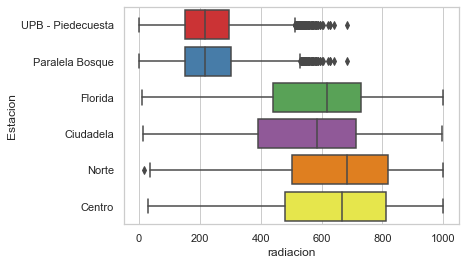

In [30]:
sns.set_theme(style="whitegrid")
estaciones=by_radiacion
grafica=sns.boxplot(x="radiacion", y="Estacion", data=estaciones ,palette="Set1", orient="h")

# FUNCIONES DE LIMITES, DATOS LIMPIOS Y DATOS ATIPICOS

In [31]:
def limites(by_radiacion): #LIMPIO, CON ATIPICOS - aun no se guardan correctamente
    
    
    n=len(by_radiacion)
    q1=(n+1)/4
    dec, ent=math.modf(q1)
    
    if(q1%2!=0):
        aa=int(ent)
        bb=int(ent+1)
        dato1=by_radiacion['radiacion'].values[aa-1]
        dato2=by_radiacion['radiacion'].values[bb-1]
        q11=dato1+dec*(dato2-dato1)
        
    else:
        q11=q1
        
    q3=3*(n+1)/4
    dec2, ent2=math.modf(q3)
    
    if(q3%2!=0):
        aa=int(ent2)
        bb=int(ent2+1)
        dato3=by_radiacion['radiacion'].values[aa-1]
        dato4=by_radiacion['radiacion'].values[bb-1]
        q33=dato3+dec2*(dato4-dato3)
        
    else:
        q33=q3
    
    iqr=q33-q11
    liminf=q11-(1.5)*iqr
    limsup=q33+(1.5)*iqr
    
    return(liminf,limsup)

In [32]:
def atipicos_no(by_radiacion): #SIN ATIPICOS
    
    
    n=len(by_radiacion)
    q1=(n+1)/4
    dec, ent=math.modf(q1)
    
    if(q1%2!=0):
        aa=int(ent)
        bb=int(ent+1)
        dato1=by_radiacion['radiacion'].values[aa-1]
        dato2=by_radiacion['radiacion'].values[bb-1]
        q11=dato1+dec*(dato2-dato1)
        
    else:
        q11=q1
        
    q3=3*(n+1)/4
    dec2, ent2=math.modf(q3)
    
    if(q3%2!=0):
        aa=int(ent2)
        bb=int(ent2+1)
        dato3=by_radiacion['radiacion'].values[aa-1]
        dato4=by_radiacion['radiacion'].values[bb-1]
        q33=dato3+dec2*(dato4-dato3)
        
    else:
        q33=q3
    
    iqr=q33-q11
    liminf=q11-(1.5)*iqr
    limsup=q33+(1.5)*iqr
    num=len(by_radiacion)
    atipicos=[] #VALORES ATIPICOS
    for i in range(0,num):
        if by_radiacion['radiacion'].values[i]<liminf or by_radiacion['radiacion'].values[i]>limsup:
            atipicos.append(by_radiacion['radiacion'].values[i])
        
        
    archo = by_radiacion.drop(by_radiacion[by_radiacion['radiacion']>limsup].index)
    archivito = archo.drop(archo[archo['radiacion']<liminf].index)
    
    
    return(archivito)   

In [33]:
def atipicos_si(by_radiacion): #LIMPIO, CON ATIPICOS - aun no se guardan correctamente
    
    
    n=len(by_radiacion)
    q1=(n+1)/4
    dec, ent=math.modf(q1)
    
    if(q1%2!=0):
        aa=int(ent)
        bb=int(ent+1)
        dato1=by_radiacion['radiacion'].values[aa-1]
        dato2=by_radiacion['radiacion'].values[bb-1]
        q11=dato1+dec*(dato2-dato1)
        
    else:
        q11=q1
        
    q3=3*(n+1)/4
    dec2, ent2=math.modf(q3)
    
    if(q3%2!=0):
        aa=int(ent2)
        bb=int(ent2+1)
        dato3=by_radiacion['radiacion'].values[aa-1]
        dato4=by_radiacion['radiacion'].values[bb-1]
        q33=dato3+dec2*(dato4-dato3)
        
    else:
        q33=q3
    
    iqr=q33-q11
    liminf=q11-(1.5)*iqr
    limsup=q33+(1.5)*iqr
    
    
    archo = by_radiacion.drop(by_radiacion[by_radiacion['radiacion']<limsup].index)
    archivito = archo.drop(archo[archo['radiacion']>liminf].index)
    
    if(len(archo)==0 and len(archivito)==0):
        #print("archivito")
        return(0)
    if(len(archo)==0 and len(archivito)!=0):
        #print("archivito")
        return(archivito)
    if(len(archo)!=0 and len(archivito)==0):
        #print("archo")
        return(archo)
    if(len(archo)!=0 and len(archivito)!=0):
        #print("concatena")
        prueba=pd.concat([archivito, archo])
        return(prueba)

# LECTURA DE LOS CSV, SE GUARDAN LOS DATOS LIMIPIOS Y ATIPICOS DE CADA ESTACION

In [34]:
archivo_norte = pd.read_csv('station1_norte.csv')
archivo_centro = pd.read_csv('station1_centro.csv')
archivo_ciudadela = pd.read_csv('station1_ciudadela.csv')
archivo_florida = pd.read_csv('station1_florida.csv')
archivo_paralelabosque = pd.read_csv('station1_paralelabosque.csv')
archivo_upb = pd.read_csv('station1_UPB-Piedecuesta.csv')

In [35]:
archivo_norte2=atipicos_no(archivo_norte) #DATOS LIMPIOS(SIN ATIPICOS)
archivo_norte2 = archivo_norte2.drop(columns=['Unnamed: 0']).copy()

archivo_centro2=atipicos_no(archivo_centro)
archivo_centro2 = archivo_centro2.drop(columns=['Unnamed: 0']).copy()

archivo_ciudadela2=atipicos_no(archivo_ciudadela)
archivo_ciudadela2 = archivo_ciudadela2.drop(columns=['Unnamed: 0']).copy()

archivo_florida2=atipicos_no(archivo_florida)
archivo_florida2 = archivo_florida2.drop(columns=['Unnamed: 0']).copy()

archivo_paralelabosque2=atipicos_no(archivo_paralelabosque)
archivo_paralelabosque2 = archivo_paralelabosque2.drop(columns=['Unnamed: 0']).copy()

archivo_upb2=atipicos_no(archivo_upb)
archivo_upb2 = archivo_upb2.drop(columns=['Unnamed: 0']).copy()

In [36]:
archivo_norte3=atipicos_si(archivo_norte) #No tiene atipicos

archivo_centro3=atipicos_si(archivo_centro) #No tiene atipicos

archivo_ciudadela3=atipicos_si(archivo_ciudadela) #No tiene atipicos

archivo_florida3=atipicos_si(archivo_florida) #No tiene atipicos

archivo_paralelabosque3=atipicos_si(archivo_paralelabosque) #Tiene atipicos
archivo_paralelabosque3 = archivo_paralelabosque3.drop(columns=['Unnamed: 0']).copy()

archivo_upb3=atipicos_si(archivo_upb) #Tiene atipicos
archivo_upb3 = archivo_upb3.drop(columns=['Unnamed: 0']).copy()

### INTERPOLACION DE DATOS ATIPICOS 

In [40]:
def reparar_atipicos(data_atipicos,data_noatipicos):
    
    DatosN=data_noatipicos
    DatosTotal= pd.DataFrame(columns=['id','Estacion','Ciudad','Ubicacion','Longitud','Latitud','radiacion','f1','hora','Año','Mes','Dia'])
    a=data_atipicos
    
    for i in range(0, (a['radiacion'].size)):
        r= a.iloc[i]
        x=str( r['hora'])
        x=x[0:5]
        x=x.replace(':','')
        x=int(x)
        interL= DatosN[DatosN['Estacion']==a.iloc[i,1]]
        interL= DatosN[DatosN['Ciudad']==a.iloc[i,2]]
        interL= interL[interL['f1']==a.iloc[i,7]]
        interL = interL.sort_values('hora')
        interL =interL.reset_index()
        del interL["id"]
        xi=[]
        fxi=[]

        for l in range(0, interL["f1"].size):
                hora=str(interL.iloc[l,8])
                hora=hora[0:5]
                hora=hora.replace(":","")
                hora=int(hora)
                magnitud = interL.iloc[l, 6]
                
                if hora in xi:
                    continue

                else:
                    xi.append(hora)
                    fxi.append(magnitud)
        grado=len(xi)
        total=0

        for m in range(0, grado):
            acu=1
            
            for n in range(0,grado):
                if(m!=n):
                    resultado=((x-xi[n])/(xi[m]-xi[n]))
                    acu=acu*resultado
                    
            acu=acu*fxi[m]
            total=total+acu
        
        if total < 0 or total > 3*max(fxi):
            cont=0
            x1=0
            x0=0
            fx1=0
            fx0=0

            for p in xi:
                if p>x:
                    x1=p
                    fx1 = fxi[cont]
                    posicionantes = cont - 1
                    
                    try:
                        x0=xi[cont]
                        fx0=fxi[posicionantes]
                    except:
                        x0 = 0
                        fx0 = 0
                cont+=1
            try:
                total= fx0 + (((fx1-fx0)/(x1-x0))*(x-x0))
            except:
                total= max(fxi)-2

            if total<0:
                total= fx0-2
            elif total>3 * max(fxi):
                total=fx0+2 

        DatosArreglados = pd.DataFrame(
        columns=['id','Estacion','Ciudad','Ubicacion','Longitud','Latitud','radiacion','f1','hora','Año','Mes','Dia'],data=[[r['id'],r['Estacion'],r['Ciudad'],r['Ubicacion'],r['Longitud'],r['Latitud'],total,r['f1'],r['hora'],r['Año'],r['Mes'],r['Dia']]])
        DatosTotal=DatosTotal.append(DatosArreglados)
        
    return DatosTotal

In [42]:
data_noatipicos_paralelabosque=archivo_paralelabosque2
data_atipicos_paralelabosque=archivo_paralelabosque3
paralelabosque_reparado=reparar_atipicos(data_atipicos_paralelabosque,data_noatipicos_paralelabosque)
paralela_junto=[data_noatipicos_paralelabosque,paralelabosque_reparado]
paralelabosque_Reparado=pd.concat(paralela_junto)
paralelabosque_Reparado=paralelabosque_Reparado.reset_index()
del paralelabosque_Reparado["index"]
paralelabosque_Reparado.to_csv('Estacion_paralelabosque.csv')


data_noatipicos_upb=archivo_upb2
data_atipicos_upb=archivo_upb3
upb_reparado=reparar_atipicos(data_atipicos_upb,data_noatipicos_upb)
upb_junto=[data_noatipicos_upb,upb_reparado]
upb_Reparado=pd.concat(upb_junto)
upb_Reparado=upb_Reparado.reset_index()
del upb_Reparado["index"]
upb_Reparado.to_csv('Estacion_upb.csv')

<ipython-input-40-78366a263967>:70: RuntimeWarning: divide by zero encountered in double_scalars
  total= fx0 + (((fx1-fx0)/(x1-x0))*(x-x0))


In [43]:
archivo_paralelabosque4 = pd.read_csv('Estacion_paralelabosque.csv')
archivo_paralelabosque4 = archivo_paralelabosque4.drop(columns=['Unnamed: 0']).copy()
archivo_paralelabosque4=archivo_paralelabosque4.round({"radiacion":1})

archivo_upb4 = pd.read_csv('Estacion_upb.csv')
archivo_upb4 = archivo_upb4.drop(columns=['Unnamed: 0']).copy()
archivo_upb4=archivo_upb4.round({"radiacion":1})

## INTERPOLACION ESPACIAL (DATOS ESTACIONES) 

In [47]:
def Filtrado(data,año,mes):
    
    data['f1'] = pd.to_datetime(data['f1'])

    data['Año'] = data['f1'].dt.year 
    data['Mes'] = data['f1'].dt.month
    data['Dia']= data['f1'].dt.day

    dataMas = (data['Año'] == año)
    filtrado_df = data[dataMas]

    datamas2= filtrado_df['Mes'] == mes
    final_df = filtrado_df[datamas2]
    final_df = final_df.sort_values('Dia')
    
    if(len(final_df)==0):
        return 0
    
    else:
        return final_df

In [48]:
def promedios(Data):

    if(type(Data) is int):
        return 0
    
    else:
        mensu = []
        dias = Data['Dia'].tolist()
        dias = set(dias)

        for i in dias:
        
            dataMas = (Data['Dia'] == i)
            filtrado_df = Data[dataMas]
            mean_df = filtrado_df['radiacion'].mean()
        
            mensu.append(mean_df)
    
        acum=0
        for j in mensu:
            acum+=j
        resultado=acum/len(mensu)
    
        return resultado

In [50]:
estaciones=[archivo_norte2,archivo_centro2,archivo_ciudadela2,archivo_florida2,archivo_paralelabosque4,archivo_upb4]

In [54]:
año=2016
mes=10

valores=[]
for i in estaciones:
    print("Ingrese la distacia a la Estacion de", i['Estacion'][0])
    di = float(input("En kilometros "))
    vsi = promedios(Filtrado(i,año,mes))
    if vsi != 0 :
        a = [di , vsi]
        valores.append(a)
    else:
        print("La Estacion de ", i['Estacion'][0], "no presenta Datos para este rango de fecha")
    print("\n")

Ingrese la distacia a la Estacion de Norte
En kilometros 8.78
La Estacion de  Norte no presenta Datos para este rango de fecha


Ingrese la distacia a la Estacion de Centro
En kilometros 5.4
La Estacion de  Centro no presenta Datos para este rango de fecha


Ingrese la distacia a la Estacion de Ciudadela
En kilometros 3.9


Ingrese la distacia a la Estacion de Florida
En kilometros 0.483


Ingrese la distacia a la Estacion de Paralela Bosque
En kilometros 0.807


Ingrese la distacia a la Estacion de UPB - Piedecuesta
En kilometros 5.88




In [55]:
valores

[[3.9, 618.4],
 [0.483, 442.3103448275862],
 [0.807, 251.25694851743245],
 [5.88, 250.62248615184103]]

### FUNCION INTERPOLACION IDW 

In [56]:
def IDW(valores,b):

    p1 = 0
    p2 = 0
    for i in range(len(valores)): 
        ope = (valores[i][1])/pow((valores[i][0]), b)
        p1 += ope
        ope2 = (1)/pow((valores[i][0]), b)
        p2 += ope2

    idw = p1/p2

    return idw

In [57]:
listaIDW = sorted(valores)
listaIDW

[[0.483, 442.3103448275862],
 [0.807, 251.25694851743245],
 [3.9, 618.4],
 [5.88, 250.62248615184103]]

In [58]:
final=IDW(listaIDW,2)
final

393.747609782173